# ADHD in NYU

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.metrics import mean_squared_error as mse

>## The dataset:
The data set contains information about ADHD in New York City. 
[link to the data source](https://data.world/nicholsn/adhd-200)

In [281]:
url = 'https://raw.githubusercontent.com/NoaNesher/ADHD-ata/main/NYU_phenotypic.csv'
data = pd.read_csv(url)
data.tail()

,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,...,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Rest_1,QC_Rest_2,QC_Rest_3,QC_Rest_4,QC_Anatomical_1,QC_Anatomical_2
217,10127,5,1.0,8.14,0.04,1,NaN,2,77,79,...,121,NaN,130,-999,NaN,NaN,NaN,NaN,1.0,NaN
218,10128,5,1.0,9.53,0.82,0,NaN,2,56,58,...,136,NaN,127,1,1.0,1.0,NaN,NaN,1.0,1.0
219,10129,5,0.0,8.39,0.38,3,NaN,2,67,71,...,-999,NaN,-999,1,1.0,1.0,NaN,NaN,1.0,NaN
220,10013,5,1.0,9.55,0.67,1,NaN,2,62,58,...,88,NaN,97,-999,1.0,1.0,NaN,NaN,1.0,NaN
221,10043,5,0.0,8.16,0.36,0,NaN,2,42,42,...,99,NaN,112,1,1.0,1.0,NaN,NaN,0.0,1.0


>### Treat missing values:


In [282]:
datacopy = data[['Gender','Age', 'Handedness', 'DX', 'ADHD Index','Inattentive', 'Hyper/Impulsive','IQ Measure', 'Verbal IQ', 'Performance IQ', 'Full4 IQ','Med Status' ]].copy()
dataC = datacopy.replace([-999], np.NaN) 
DataC = dataC.dropna()
DataC.head()

,Gender,Age,Handedness,DX,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full4 IQ,Med Status
0,1.0,7.29,0.83,0,40.0,41.0,41.0,2.0,112.0,103.0,109.0,1.0
3,0.0,8.04,0.50,1,86.0,82.0,85.0,2.0,109.0,120.0,116.0,1.0
4,0.0,12.44,0.21,0,42.0,43.0,44.0,2.0,117.0,126.0,124.0,1.0
7,1.0,8.61,0.67,1,64.0,69.0,65.0,2.0,106.0,106.0,107.0,1.0
8,1.0,8.59,0.21,0,43.0,41.0,48.0,2.0,131.0,108.0,122.0,1.0


In [283]:
DataC.dtypes

Gender             float64
Age                float64
Handedness         float64
DX                   int64
ADHD Index         float64
Inattentive        float64
Hyper/Impulsive    float64
IQ Measure         float64
Verbal IQ          float64
Performance IQ     float64
Full4 IQ           float64
Med Status         float64
dtype: object

### ADHD-200 Phenotypic Key
<div>
<img src="https://github.com/NoaNesher/ADHD-ata/blob/main/ADHD%20phenotypic%20key.jpeg?raw=true"
     width="400"/>
</div>

For more keys, click [here](http://fcon_1000.projects.nitrc.org/indi/adhd200/general/ADHD-200_PhenotypicKey.pdf)

---

>## Understanding the data
Checking the difference between the size of ADHD by gender


In [284]:
DataP = DataC.copy()
DataP["Gender"].replace({0.0: 'Female', 1.0: "Male"}, inplace=True)
DataP.pivot_table(['Inattentive','Hyper/Impulsive','ADHD Index' ],'Gender') 

,ADHD Index,Hyper/Impulsive,Inattentive
Gender,,,
Female,52.333333,52.900000,52.116667
Male,57.457831,56.385542,57.313253


- Looks like the male  are leading in all parameters
- We'll check how many males and females are tested

Gender
Female    60
Male      83
Name: Gender, dtype: int64

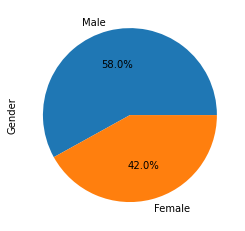

In [285]:
DataP = DataC.copy()
DataP["Gender"].replace({0.0: 'Female', 1.0: "Male"}, inplace=True)
DataP['Gender'].value_counts().plot.pie(autopct='%1.1f%%')
DataP.groupby('Gender')['Gender'].count()

Study the differences between males and females: 

Seperate into two datasets:

In [286]:
female = DataC.loc[DataC.Gender == 0.0]
male = DataC.loc[DataC.Gender == 1.0]

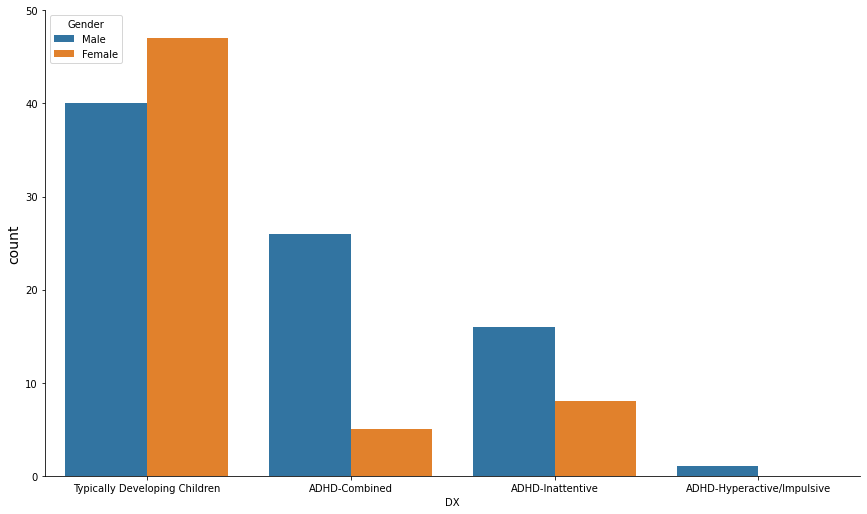

In [287]:
FixD = pd.DataFrame(columns = ['DX', 'Gender'])
FixD['DX'] = DataC['DX']
FixD['Gender'] = DataC['Gender']
FixD["DX"].replace({0: 'Typically Developing Children', 1: "ADHD-Combined",2:'ADHD-Hyperactive/Impulsive',3:'ADHD-Inattentive'}, inplace=True)
FixD["Gender"].replace({0.0: 'Female', 1.0: "Male"}, inplace=True)
FixD.head()
Cplot = sns.catplot( x='DX',
             kind="count",
             hue="Gender", 
             height=7, legend_out=False,
             aspect=1.7,data=FixD)

plt.ylim(0,50)
plt.xlabel('DX')
plt.ylabel("count", size=14)
plt.show()

In [288]:
DataP["IQ Measure"].replace({1.0: 'WISC', 2.0: "WASI", 3.0: "WISCC-R", 4.0: "2 WASI", 5.0: "WISE/ WAIS"}, inplace=True)
DataP.groupby('IQ Measure')['IQ Measure'].count()

IQ Measure
WASI    143
Name: IQ Measure, dtype: int64

We saw that they were all tested in a certain type of test: "Wechsler Abbreviated Scale of Intelligence (WASI)". 

- After research, we discovered the test is coordinated by age.
- we also found out that if the IQ (more than 130 units) significantly exceeds the average level, then such a person is called Gifted.

<div>
<img src="https://github.com/NoaNesher/ADHD-ata/blob/31314d07cf0d4a2e263ac1068b8310ab686c106f/WhatsApp%20Image%202021-05-30%20at%2013.52.25.jpeg?raw=true" width="400"/>
</div>

The informtion is taken from [here](https://iq-test-international.org/eng_test?gclid=Cj0KCQjw78yFBhCZARIsAOxgSx0nIbuMG3Al8hSEDdqqBvMM7-edKqOQMcT4rmM_Qx7wY9ZmGDMdOXkaAp24EALw_wcB)

we can see that the avrarge IQ by the age of 18 is between 90-100

In [289]:
Agemean = DataC['Age'].mean()
Agemin = DataC['Age'].min()
Agemax = DataC['Age'].max()
print("The average age is:", Agemean ,"\n""The minimum age tested is:",Agemin,"\n""The maximum age tested is:", Agemax)

The average age is: 11.788671328671331 
The minimum age tested is: 7.17 
The maximum age tested is: 17.96


In [290]:
Datag = DataC.copy()
Datag['AgeIQ'] =pd.cut(Datag['Age'],[7, 9, 11,13,15,18])

108.18181818181819

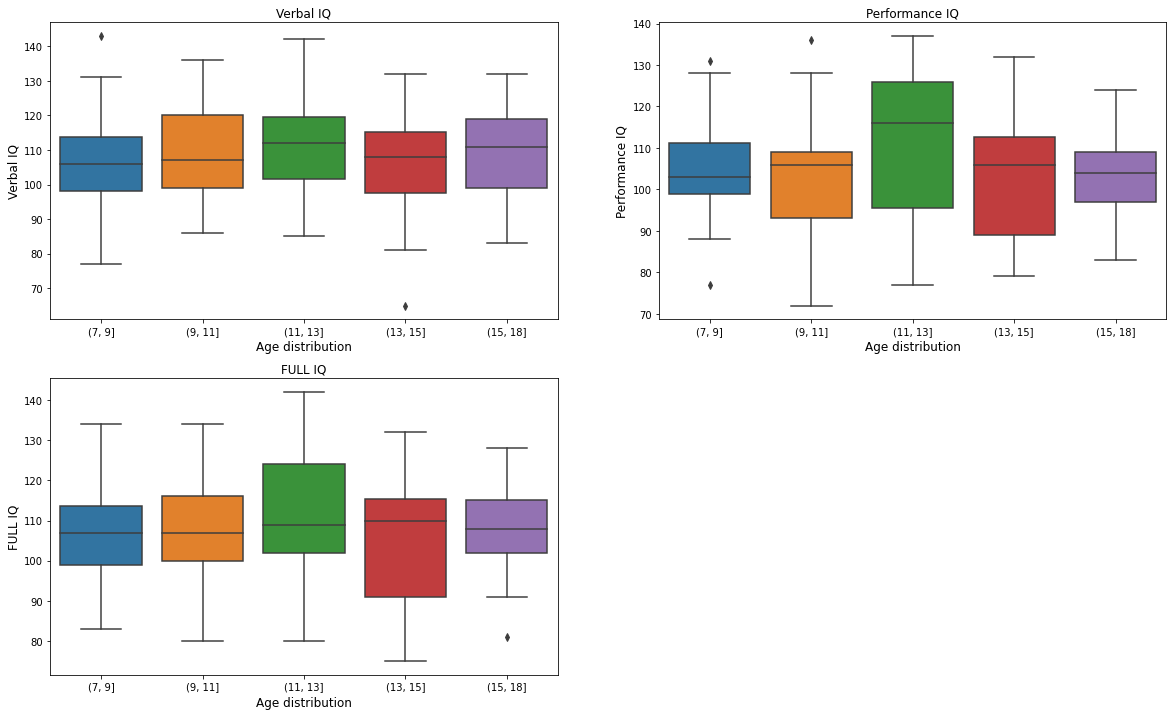

In [291]:
fig,axis = plt.subplots(figsize = (20,12))
plt.subplot(2,2,1)
plt.title("Verbal IQ")
sns.boxplot(x='AgeIQ', y='Verbal IQ', data=Datag)
plt.xlabel('Age distribution', size=12)
plt.ylabel("Verbal IQ", size=12)
plt.subplot(2,2,2)
plt.title("Performance IQ")
sns.boxplot(x='AgeIQ', y='Performance IQ', data=Datag)
plt.xlabel('Age distribution', size=12)
plt.ylabel("Performance IQ", size=12)
plt.subplot(2,2,3)
plt.title("FULL IQ")
sns.boxplot(x='AgeIQ', y='Full4 IQ', data=Datag)
plt.xlabel('Age distribution', size=12)
plt.ylabel("FULL IQ", size=12)
DataC['Full4 IQ'].mean()

 - we can see that our IQ average is higher than the general average
 - We'll check how many gifted youth were tested and what is their diagnosis


In [292]:
DataGif = DataC.copy()
DataGif.rename(columns={'Full4 IQ':'FullIQ'},inplace=True)
DataGif['DX'].replace({0: 'Typically Developing Children', 1: "ADHD-Combined",2:'ADHD-Hyperactive/Impulsive',3:'ADHD-Inattentive'}, inplace=True)
Gifted = DataGif.loc[DataGif.FullIQ>= 130]
Gifted.groupby('DX')['FullIQ'].count()
Gifted.pivot_table(['FullIQ'],'DX',aggfunc='count') 


,FullIQ
DX,
ADHD-Combined,1
ADHD-Inattentive,1
Typically Developing Children,5


Just as we thought most gifted youth are 'Typically Developing Children'(un-diagnosed)

Text(0, 0.5, 'Count')

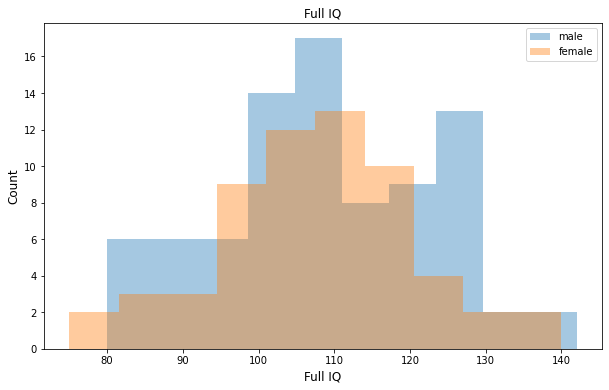

In [293]:
fig,axis = plt.subplots(figsize = (10,6))
plt.title("Full IQ")
plt.hist(male['Full4 IQ'], alpha=0.4, label='male')
plt.hist(female['Full4 IQ'], alpha=0.4, label='female')
plt.legend(loc='upper right')
plt.xlabel('Full IQ', size=12)
plt.ylabel("Count", size=12)

We can notice that males's IQ is higher then females

### We want to see if there's a connction between the type of interference and the IQ score

<AxesSubplot:>

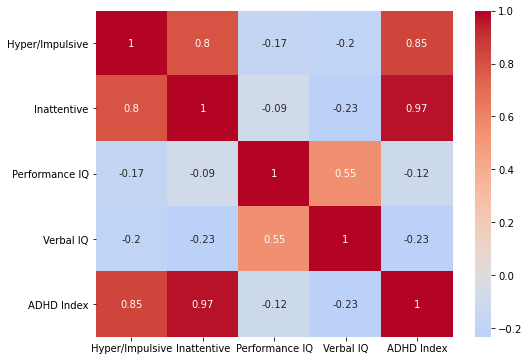

In [294]:
corrs = ['Hyper/Impulsive','Inattentive','Performance IQ', 'Verbal IQ', 'ADHD Index']
correlation = DataC[corrs].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, cmap='coolwarm', center=0, annot = True)

##### Obeservation:
- First we saw that their is no connction between interference and the IQ score
- But we notice that their is high corrolation between 'ADHD Index','Inattentive' and 'Hyper/Impulsive' 

## Following what we discovered, we wanted to make a prediction.
>When we enter the relevant data,
we wanted to check if we can predict what type of interference


Acc: 0.532


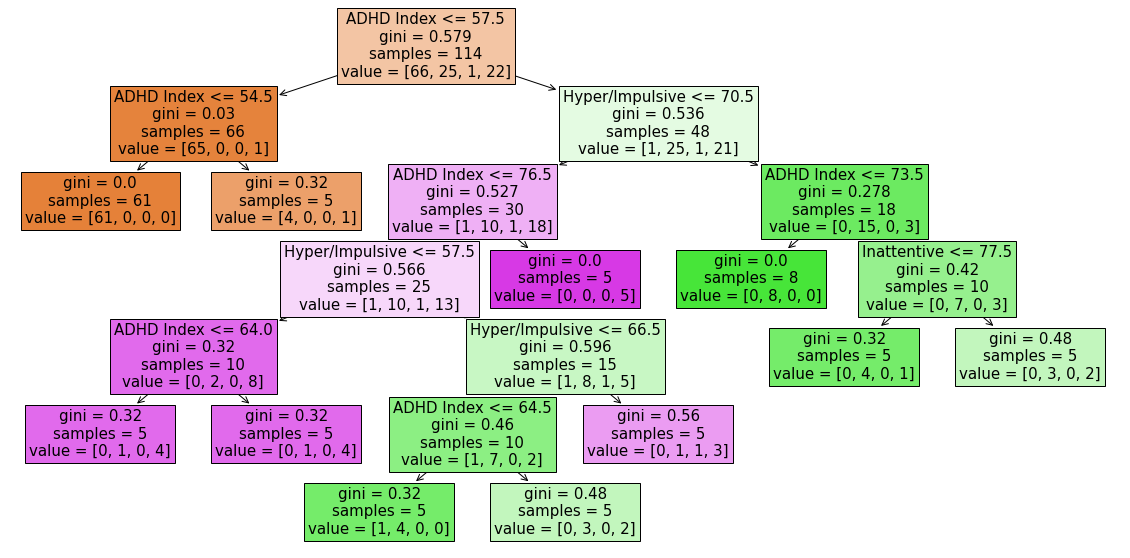

In [295]:
feat = ['Inattentive', 'Hyper/Impulsive', 'ADHD Index']
label = ['DX']
X = DataC[feat]
y = DataC[label]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=39)
def plot_tree(tree_model,features,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
def eval(x,y,model):
    pred = model.predict(x)
    y_alt=y.values
    print("Acc: {:.3f}".format((pred == y_alt).mean()))
model = DecisionTreeClassifier(min_samples_leaf=5,random_state=41)

model.fit(X_train,y_train)

eval(X_test,y_test,model)

plot_tree(model,feat,(20,10))

---
# Thank you for listening !!!!
---